# Cis or Trans - Comparing divergent regions with the cross-species conditions

Here we compare the HH and MM specific regions to the HM and MH conditions to obtain cis only, trans only and cis & trans regions. We also generate figures depicting these calls. 

## Make new CIS_TRANS section in config.ini

In [2]:
#function
append_section_to_ini <- function(ini_file, new_section) {
    if (is.list(new_section)) {
        ini <- ini::read.ini(ini_file)
        ini <- c(ini,new_section)
        ini::write.ini(x=ini, filepath=ini_file)
    } else {
        print('new_section is not a list')
    }
}

#list of key-value pairs
`CIS_TRANS` <- list(dir='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans', 
               `hh-active_mm-inactive_mh-inactive_cis`='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_MH-inactive_cis.bed', 
               `mm-active_hh-inactive_hm-inactive_cis`='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_HM-inactive_cis.bed', 
               `hh-active_mm-inactive_hm-inactive_trans`='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_HM-inactive_trans.bed', 
               `mm-active_hh-inactive_mh-inactive_trans`='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_MH-inactive_trans.bed',
                plots='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/plots'
                bin='/data/hodges_lab/ATAC-STARR_B-cells/bin_human-evolution/processing-and-region-calling/cis-or-trans.ipynb')

#list of section, resulting in list of list.
new_section <- list(`CIS_TRANS`=`CIS_TRANS`)

#write ini
append_section_to_ini("../config.ini", new_section)

## Cis effects

Does HH-active_MM-inactive overlap MH-active? If no, it is divergent because of a cis effect. If yes, not due to cis regulatory divergence. 

Does MM-active_HH-inactive overlap HM-active? If no, it is divergent because of a cis effect. If yes, not due to cis regulatory divergence. 

In [1]:
# bash kernel
#input
HM=$(read-ini ../config.ini ACTIVITY hm_active_regions)
MH=$(read-ini ../config.ini ACTIVITY mh_active_regions)

HH_specific=$(read-ini ../config.ini HH-VS-MM hh-active_mm-inactive)
MM_specific=$(read-ini ../config.ini HH-VS-MM mm-active_hh-inactive)

#output
HH_cis=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_mh-inactive_cis)
MM_cis=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_hm-inactive_cis)
HH_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_hm-inactive_trans)
MM_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_mh-inactive_trans)

HH_not_cis=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_mh-inactive_not_cis)
MM_not_cis=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_hm-inactive_not_cis)
HH_not_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_hm-inactive_not_trans)
MM_not_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_mh-inactive_not_trans)

In [2]:
#write HH_specific regions that do not overlap MH
bedtools intersect -v -f 0.5 -F 0.5 -e -a $HH_specific -b $MH > $HH_cis

#write HH_specific regions that do not overlap MH
bedtools intersect -v -f 0.5 -F 0.5 -e -a $MM_specific -b $HM > $MM_cis

In [3]:
#how many cis effects?
wc -l $HH_cis
wc -l $MM_cis

5745 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_MH-inactive_cis.bed
5034 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_HM-inactive_cis.bed


In [4]:
#write not cis regions: 
#write the whole interval
#HH_not_cis
bedtools intersect -u -f 0.5 -F 0.5 -e -a $HH_specific -b $MH > tmp1.bed
bedtools intersect -u -f 0.5 -F 0.5 -e -b $HH_specific -a $MH > tmp2.bed
cat tmp1.bed tmp2.bed | sort -k1,1 -k2,2n - | bedtools merge -i - > $HH_not_cis
rm tmp1.bed tmp2.bed

#MM_not_cis
bedtools intersect -u -f 0.5 -F 0.5 -e -a $MM_specific -b $HM > tmp1.bed
bedtools intersect -u -f 0.5 -F 0.5 -e -b $MM_specific -a $HM > tmp2.bed
cat tmp1.bed tmp2.bed | sort -k1,1 -k2,2n - | bedtools merge -i - > $MM_not_cis
rm tmp1.bed tmp2.bed

## Trans effects

Does HH-active_MM-inactive overlap HM-active? If no, it is divergent because of a trans effect. If yes, not due to trans regulatory divergence. 

Does MM-active_HH-inactive overlap MH-active? If no, it is divergent because of a trans effect. If yes, not due to trans regulatory divergence. 

In [5]:
#write HH_specific regions that do not overlap MH
bedtools intersect -v -f 0.5 -F 0.5 -e -a $HH_specific -b $HM > $HH_trans

#write HH_specific regions that do not overlap MH
bedtools intersect -v -f 0.5 -F 0.5 -e -a $MM_specific -b $MH > $MM_trans

In [6]:
#how many trans effects?
wc -l $HH_trans
wc -l $MM_trans

5443 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_HM-inactive_trans.bed
5165 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_MH-inactive_trans.bed


In [ ]:
#write not trans regions: 
#write the whole interval
#HH_not_trans
bedtools intersect -u -f 0.5 -F 0.5 -e -a $HH_specific -b $HM > tmp1.bed
bedtools intersect -u -f 0.5 -F 0.5 -e -b $HH_specific -a $HM > tmp2.bed
cat tmp1.bed tmp2.bed | sort -k1,1 -k2,2n - | bedtools merge -i - > $HH_not_trans
rm tmp1.bed tmp2.bed

#MM_not_trans
bedtools intersect -u -f 0.5 -F 0.5 -e -a $MM_specific -b $MH > tmp1.bed
bedtools intersect -u -f 0.5 -F 0.5 -e -b $MM_specific -a $MH > tmp2.bed
cat tmp1.bed tmp2.bed | sort -k1,1 -k2,2n - | bedtools merge -i - > $MM_not_trans
rm tmp1.bed tmp2.bed

## Cis and Trans effects

__HH-active__   
Does HH-active_MM-inactive_MH-inactive_cis overlap HH-active_MM-inactive_HM-inactive_trans? If yes, it is divergent because of cis and trans effects. If no, it is cis only.

Does HH-active_MM-inactive_HM-inactive_trans overlap HH-active_MM-inactive_MH-inactive_cis? If yes, it is divergent because of cis and trans effects. If no, it is trans only.

__MM-active__   
Does MM-active_HH-inactive_MH-inactive_cis overlap MM-active_HH-inactive_HM-inactive_trans? If yes, it is divergent because of cis and trans effects. If no, it is cis only.

Does MM-active_HH-inactive_HM-inactive_trans overlap MM-active_HH-inactive_MH-inactive_cis? If yes, it is divergent because of cis and trans effects. If no, it is trans only.

Because the cis and trans regions originate from the same file, require 100% overlap

In [7]:
# bash kernel
#input
HH_cis=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_mh-inactive_cis)
MM_cis=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_hm-inactive_cis)
HH_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_hm-inactive_trans)
MM_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_mh-inactive_trans)

#output
HH_cis_only=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis-only)
HH_trans_only=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_trans-only)
HH_cis_and_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis+trans)

MM_cis_only=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis-only)
MM_trans_only=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_trans-only)
MM_cis_and_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis+trans)

cis_only=$(read-ini ../config.ini CIS_TRANS cis-only)
trans_only=$(read-ini ../config.ini CIS_TRANS trans-only)
cis_and_trans=$(read-ini ../config.ini CIS_TRANS cis+trans)

In [13]:
#HH-active_MM-inactive cis+trans
bedtools intersect -f 1.0 -r -a $HH_cis -b $HH_trans > $HH_cis_and_trans

In [14]:
#HH-active_MM-inactive cis only
bedtools intersect -v -f 1.0 -r -a $HH_cis -b $HH_trans > $HH_cis_only

In [15]:
#HH-active_MM-inactive trans only
bedtools intersect -v -f 1.0 -r -a $HH_trans -b $HH_cis > $HH_trans_only

In [16]:
#MM-active_HH-inactive cis+trans
bedtools intersect -f 1.0 -r -a $MM_cis -b $MM_trans > $MM_cis_and_trans

In [17]:
#MM-active_HH-inactive cis only
bedtools intersect -v -f 1.0 -r -a $MM_cis -b $MM_trans > $MM_cis_only

In [18]:
#MM-active_HH-inactive trans only
bedtools intersect -v -f 1.0 -r -a $MM_trans -b $MM_cis > $MM_trans_only

In [8]:
## Merge effects by type
cat $HH_cis_and_trans $MM_cis_and_trans > $cis_and_trans
cat $HH_cis_only $MM_cis_only > $cis_only
cat $HH_trans_only $MM_trans_only > $trans_only

We can also get regions that are divergent neither in cis or trans as we define here. How many times do we see this occur?

In [19]:
cat $HH_cis_and_trans $HH_cis_only $HH_trans_only | bedtools intersect -v -f 1.0 -r -b - -a $HH_specific | wc -l 

365


In [20]:
cat $MM_cis_and_trans $MM_cis_only $MM_trans_only | bedtools intersect -v -f 1.0 -r -b - -a $MM_specific | wc -l 

736


This is not that much. It is roughly 6% of the divergent regions. Write them out as "unknown", in case we want to use them later.

In [21]:
#output
HH_unknown=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_unknown)
MM_unknown=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_unknown)

In [22]:
cat $HH_cis_and_trans $HH_cis_only $HH_trans_only | bedtools intersect -v -f 1.0 -r -b - -a $HH_specific > $HH_unknown

In [23]:
cat $MM_cis_and_trans $MM_cis_only $MM_trans_only | bedtools intersect -v -f 1.0 -r -b - -a $MM_specific > $MM_unknown

In [26]:
#how many in each category?
for i in $HH_cis_and_trans $HH_cis_only $HH_trans_only $MM_cis_and_trans $MM_cis_only $MM_trans_only
do
    wc -l $i
done

4631 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_cis+trans.bed
1114 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_cis-only.bed
812 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/HH-active_MM-inactive_trans-only.bed
3994 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_cis+trans.bed
1040 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_cis-only.bed
1171 /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/HH-vs-MM_divergent_cis-trans/MM-active_HH-inactive_trans-only.bed


## Plot Region Counts as Bar Plot

In [1]:
# r kernel
suppressPackageStartupMessages(library(tidyverse))

ini <- ini::read.ini("../config.ini")

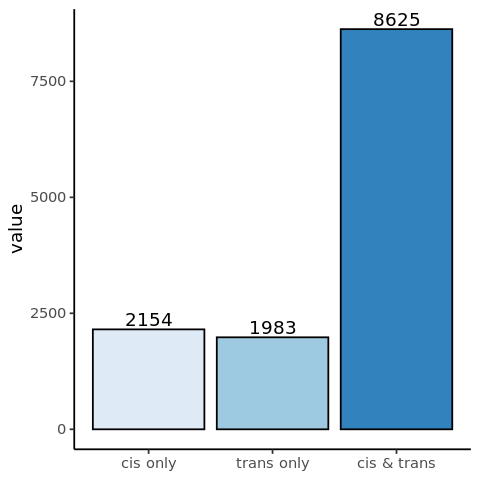

In [2]:
#pie chart
df <- data.frame(
  group = c("cis & trans", "cis only", "trans only"),
  value = c(4631+3994, 1114+1040, 812+1171))
  
df$group <- factor(df$group, levels = rev(c("cis & trans", "trans only", "cis only")))
  
library(ggplot2)

p <- ggplot(df, aes(x=group, y=value, fill=group))+
    geom_col(color = "black", position = "dodge") +
    geom_text(aes(y = value, label = value), vjust=-0.25, position = position_dodge(width = .9)) +
    labs(fill = "category") +
    scale_fill_brewer(palette = "Blues") + 
    theme_classic() +
    theme(axis.title.x=element_blank(), legend.position = "none")

options(repr.plot.width = 4, repr.plot.height = 4)
p

ggsave(p, file = paste0(ini$CIS_TRANS$plots,"/region-counts-barchart.pdf"), device=cairo_pdf, height = 4, width = 4)

## Plot Cis & Trans Overlaps as Euler Plot

In [3]:
library(eulerr)

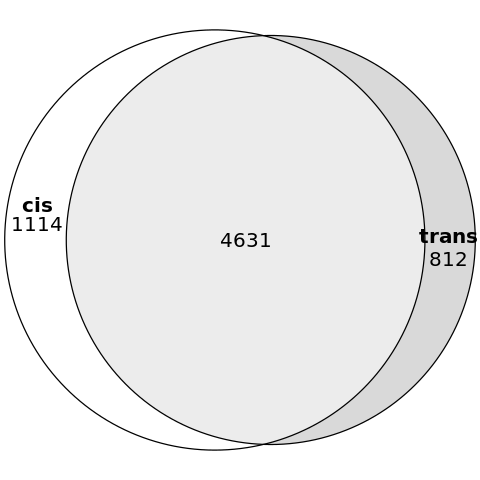

In [4]:
## prepare plot:
hu_eul <- euler(c("cis" = 1114, "trans" = 812, "cis&trans" = 4631)) %>% plot(quantities = TRUE)

#show plot
hu_eul

ggsave(hu_eul, file = paste0(ini$CIS_TRANS$plots,"/euler_divergent_HH-acctive_cis+trans.pdf"), device=cairo_pdf, height = 3, width = 3)

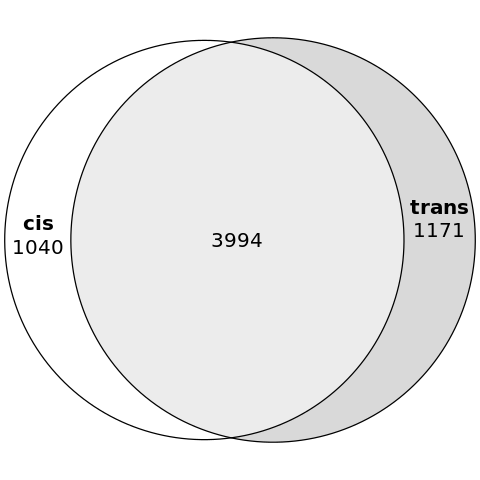

In [5]:
## prepare plot:
ma_eul <- euler(c("cis" = 1040, "trans" = 1171, "cis&trans" = 3994)) %>% plot(quantities = TRUE)

#show plot
ma_eul

ggsave(ma_eul, file = paste0(ini$CIS_TRANS$plots,"/euler_divergent_mm-acctive_cis+trans.pdf"), device=cairo_pdf, height = 3, width = 3)

## ATAC-STARR Activity - Heatmaps

### Cis / trans

In [1]:
# bash kernel

#BED
HH_cis=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_mh-inactive_cis)
MM_cis=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_hm-inactive_cis)
HH_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_hm-inactive_trans)
MM_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_mh-inactive_trans)

HH_not_cis=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_mh-inactive_not_cis)
MM_not_cis=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_hm-inactive_not_cis)
HH_not_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_hm-inactive_not_trans)
MM_not_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_mh-inactive_not_trans)

#BW 
HH_BW=$(read-ini ../config.ini ACTIVITY_BW hh_merged)
HM_BW=$(read-ini ../config.ini ACTIVITY_BW hm_merged)
MH_BW=$(read-ini ../config.ini ACTIVITY_BW mh_merged)
MM_BW=$(read-ini ../config.ini ACTIVITY_BW mm_merged)
PLOT_DIR=$(read-ini ../config.ini CIS_TRANS plots)

In [2]:
#HH_cis
computeMatrix reference-point -S $HH_BW $MM_BW $MH_BW \
    -R $HH_cis $HH_not_cis \
    -a 1000 -b 1000 --referencePoint center --binSize 10 --missingDataAsZero -p 4 \
    -o ${PLOT_DIR}/matrix_HH_cis-all_activity.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chr14_GL000225v1_random	    211173
chrUn_KI270423v1	       981
chrUn_KI270390v1	      2387
chr1_KI270708v1_random	    127682
chr11_KI270831v1_alt	    296895
chr2_KI270894v1_alt	    214158
chr3_KI270935v1_alt	    197351
chr22_KI270735v1_random	     42811
chr7_KI270899v1_alt	    190869
chrUn_KI270589v1	     44474
chr19_GL949752v1_alt	    987100
chr13_KI270838v1_alt	    306913
chr17_GL383563v3_alt	    375691
chr19_GL949748v2_alt	   1064304
chrUn_KI270385v1	       990
chrUn_KI270386v1	      1788
chr12_GL877876v1_alt	    408271
chrUn_KI270425v1	      1884
chr12_GL383549v1_alt	    120804
chr21_KI270873v1_alt	    143900
chrUn_KI270316v1	      1444
chr7_KI270803v1_alt	   1111570
chr6_GL000255v2_alt	   4606388
chrUn_KI270582v1	      6504
chr17_KI270861v1_alt	    196688
chrUn_KI270581v1	      7046
chr7_GL383534v2_alt	    119183
chr8_KI270814v1_alt	    141812
chrUn_GL000216v2	    176608
chr12_KI270836v1_alt	 

chrUn_KI270529v1	      1899
chrX_KI270881v1_alt	    144206
chr5_KI270795v1_alt	    131892
chrUn_KI270419v1	      1029
chr19_KI270930v1_alt	    200773
chrUn_KI270511v1	      8127
chrUn_KI270315v1	      2276
chrUn_KI270335v1	      1048
chr8_KI270821v1_alt	    985506
chr6_GL000254v2_alt	   4827813
chr6_GL000256v2_alt	   4929269
chr12_KI270835v1_alt	    238139
chrUn_KI270517v1	      3253
chr3_KI270924v1_alt	    166540
chr19_KI270914v1_alt	    205194
chrUn_KI270338v1	      1428
chr2_KI270769v1_alt	    120616
chr19_KI270938v1_alt	   1066800
chrUn_KI270411v1	      2646
chr12_KI270904v1_alt	    572349
chr1_KI270765v1_alt	    185285
chr21_GL383579v2_alt	    201197
chr19_KI270932v1_alt	    215732
chr13_KI270839v1_alt	    180306
chr4_GL383527v1_alt	    164536
chrUn_KI270330v1	      1652
chrUn_KI270468v1	      4055
chr20_KI270871v1_alt	     58661
chrUn_KI270435v1	     92983
chr19_GL383574v1_alt	    155864
chrUn_KI270395v1	      1143
chrUn_KI270336v1	      1026
chr3_KI270779v1_alt	    205312
chr14_

In [3]:
#HH_trans
computeMatrix reference-point -S $HH_BW $MM_BW $HM_BW \
    -R $HH_trans $HH_not_trans \
    -a 1000 -b 1000 --referencePoint center --binSize 10 --missingDataAsZero -p 4 \
    -o ${PLOT_DIR}/matrix_HH_trans-all_activity.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chr20_KI270871v1_alt	     58661
chrUn_KI270745v1	     41891
chr3_JH636055v2_alt	    173151
chr7_KI270807v1_alt	    126434
chr1_GL383518v1_alt	    182439
chr8_KI270818v1_alt	    145606
chr19_KI270884v1_alt	    157053
chr20_KI270869v1_alt	    118774
chr17_JH159147v1_alt	     70345
chr7_KI270805v1_alt	    209988
chr5_KI270794v1_alt	    164558
chrUn_KI270517v1	      3253
chr9_KI270717v1_random	     40062
chr2_KI270776v1_alt	    174166
chr3_KI270783v1_alt	    109187
chr8_KI270810v1_alt	    374415
chr21_GL383579v2_alt	    201197
chrUn_KI270587v1	      2969
chr18_KI270912v1_alt	    174061
chrUn_KI270510v1	      2415
chr16_KI270856v1_alt	     63982
chrUn_KI270468v1	      4055
chrUn_KI270333v1	      2699
chr18_KI270864v1_alt	    111737
chrUn_KI270509v1	      2318
chrUn_KI270316v1	      1444
chrUn_KI270528v1	      2983
chr5_GL383532v1_alt	     82728
chr19_KI270883v1_alt	    170399
chr14_KI270847v1_alt	   151

chr2_KI270772v1_alt	    133041
chrUn_KI270583v1	      1400
chr19_KI270922v1_alt	    187935
chr2_KI270894v1_alt	    214158
chr11_KI270831v1_alt	    296895
chr19_KI270915v1_alt	    170665
chrUn_KI270466v1	      1233
chrUn_GL000216v2	    176608
chr3_KI270784v1_alt	    184404
chr19_GL383575v2_alt	    170222
chr6_GL000255v2_alt	   4606388
chr19_GL949753v2_alt	    796479
chrUn_KI270379v1	      1045
chrUn_KI270508v1	      1951
chr22_KI270878v1_alt	    186262
chr16_GL383556v1_alt	    192462
chr7_KI270806v1_alt	    158166
chr2_KI270774v1_alt	    223625
chr1_KI270707v1_random	     32032
chr9_GL383541v1_alt	    171286
chr15_KI270850v1_alt	    430880
chrUn_KI270364v1	      2855
chrUn_KI270743v1	    210658
chrUn_KI270742v1	    186739
chr5_GL000208v1_random	     92689
chr20_GL383577v2_alt	    128386
chr4_KI270788v1_alt	    158965
chrUn_KI270395v1	      1143
chr12_GL383549v1_alt	    120804
chr2_GL383522v1_alt	    123821
chr19_KI270917v1_alt	    190932
chr4_GL000257v2_alt	    586476
chr9_KI270720v1_ra

In [4]:
#MM_cis
computeMatrix reference-point -S $HH_BW $MM_BW $HM_BW \
    -R $MM_cis $MM_not_cis \
    -a 1000 -b 1000 --referencePoint center --binSize 10 --missingDataAsZero -p 4 \
    -o ${PLOT_DIR}/matrix_MM_cis-all_activity.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chr5_GL383532v1_alt	     82728
chr14_KI270847v1_alt	   1511111
chrUn_KI270745v1	     41891
chrUn_KI270362v1	      3530
chr19_GL949746v1_alt	    987716
chr6_GL000255v2_alt	   4606388
chr19_KI270883v1_alt	    170399
chrUn_KI270741v1	    157432
chr22_GL383583v2_alt	     96924
chrUn_KI270516v1	      1300
chr2_KI270775v1_alt	    138019
chr16_KI270856v1_alt	     63982
chrUn_KI270305v1	      1472
chr9_KI270718v1_random	     38054
chrUn_KI270515v1	      6361
chr19_KI270919v1_alt	    170701
chrUn_KI270373v1	      1451
chr8_KI270926v1_alt	    229282
chr7_KI270805v1_alt	    209988
chrUn_KI270517v1	      3253
chr2_KI270774v1_alt	    223625
chr18_KI270863v1_alt	    167999
chrUn_KI270382v1	      4215
chrUn_KI270424v1	      2140
chr22_KI270875v1_alt	    259914
chrUn_KI270302v1	      2274
chr19_KI270914v1_alt	    205194
chrUn_KI270392v1	       971
chr1_GL383519v1_alt	    110268
chr2_GL582966v2_alt	     96131
chr8_

chr17_KI270862v1_alt	    391357
chr12_GL383549v1_alt	    120804
chr19_GL949753v2_alt	    796479
chrUn_KI270363v1	      1803
chrUn_KI270396v1	      1880
chr17_JH159148v1_alt	     88070
chr12_KI270837v1_alt	     40090
chrUn_KI270335v1	      1048
chr13_KI270841v1_alt	    169134
chr17_KI270730v1_random	    112551
chr4_KI270788v1_alt	    158965
chr5_KI270792v1_alt	    179043
chr8_KI270811v1_alt	    292436
chrUn_KI270548v1	      1599
chr1_KI270759v1_alt	    425601
chr19_GL949750v2_alt	   1066390
chr19_KI270868v1_alt	     61734
chr4_KI270789v1_alt	    205944
chrUn_KI270510v1	      2415
chr2_KI270767v1_alt	    161578
chrUn_KI270384v1	      1658
chrUn_KI270336v1	      1026
chr1_KI270765v1_alt	    185285
chr15_KI270851v1_alt	    263054
chr16_KI270854v1_alt	    134193
chr17_KI270861v1_alt	    196688
chr19_KI270930v1_alt	    200773
chr21_GL383581v2_alt	    116689
chr19_GL949751v2_alt	   1002683
chr22_KI270737v1_random	    103838
chr21_GL383580v2_alt	     74653
chr22_KI270735v1_random	     42811
ch

In [5]:
#MM_trans
computeMatrix reference-point -S $HH_BW $MM_BW $MH_BW \
    -R $MM_trans $MM_not_trans \
    -a 1000 -b 1000 --referencePoint center --binSize 10 --missingDataAsZero -p 4 \
    -o ${PLOT_DIR}/matrix_MM_trans-all_activity.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chrX_KI270880v1_alt	    284869
chrUn_KI270330v1	      1652
chr3_KI270783v1_alt	    109187
chr5_KI270794v1_alt	    164558
chr14_KI270844v1_alt	    322166
chr3_KI270777v1_alt	    173649
chr17_KI270909v1_alt	    325800
chr15_KI270849v1_alt	    244917
chr19_GL383576v1_alt	    188024
chr6_GL000256v2_alt	   4929269
chrUn_KI270593v1	      3041
chr8_KI270821v1_alt	    985506
chr6_KI270798v1_alt	    271782
chr19_KI270886v1_alt	    204239
chr5_GL949742v1_alt	    226852
chr22_KI270735v1_random	     42811
chr6_GL000251v2_alt	   4795265
chr6_GL383533v1_alt	    124736
chr7_KI270807v1_alt	    126434
chr16_KI270855v1_alt	    232857
chr19_GL949748v2_alt	   1064304
chr22_KI270876v1_alt	    263666
chrUn_KI270516v1	      1300
chr18_KI270864v1_alt	    111737
chr4_KI270787v1_alt	    111943
chrUn_KI270371v1	      2805
chrUn_KI270329v1	      1040
chr15_KI270905v1_alt	   5161414
chr4_KI270789v1_alt	    205944
chrUn_KI27037

chrUn_KI270317v1	     37690
chr3_KI270782v1_alt	    162429
chr5_KI270793v1_alt	    126136
chrUn_KI270741v1	    157432
chr14_KI270845v1_alt	    180703
chrUn_GL000218v1	    161147
chr6_GL000252v2_alt	   4604811
chr15_KI270850v1_alt	    430880
chr3_GL383526v1_alt	    180671
chr8_KI270901v1_alt	    136959
chr6_GL000253v2_alt	   4677643
chrUn_KI270544v1	      1202
chr12_GL877875v1_alt	    167313
chr8_KI270810v1_alt	    374415
chrUn_KI270379v1	      1045
chr19_KI270914v1_alt	    205194
chr7_KI270809v1_alt	    209586
chr9_KI270717v1_random	     40062
chrUn_KI270374v1	      2656
chr11_KI270830v1_alt	    177092
chr4_GL383528v1_alt	    376187
chr19_KI270884v1_alt	    157053
chr21_KI270874v1_alt	    166743
chr2_KI270773v1_alt	     70887
chrUn_KI270466v1	      1233
chrUn_KI270423v1	       981
chrUn_KI270382v1	      4215
chrUn_KI270336v1	      1026
chrUn_KI270315v1	      2276
chr19_GL949747v2_alt	    729520
chrUn_KI270334v1	      1368
chr5_KI270898v1_alt	    130957
chr6_KB021644v2_alt	    185823
ch

In [6]:
plotHeatmap -m ${PLOT_DIR}/matrix_HH_cis-all_activity.gz \
    -o ${PLOT_DIR}/heatmap_HH_cis-all_activity.pdf \
    --dpi 300 --plotFileFormat pdf \
    --sortRegions no \
    --refPointLabel center \
    --regionsLabel "HH cis" "HH not cis" \
    --colorMap RdBu \
    --zMin -0.5 \
    --zMax 0.5 \
    --samplesLabel "HH Activity" "MM Activity" "MH Activity" \
    --heatmapHeight 8 --heatmapWidth 2 --whatToShow 'heatmap and colorbar'
    
plotHeatmap -m ${PLOT_DIR}/matrix_HH_trans-all_activity.gz \
    -o ${PLOT_DIR}/heatmap_HH_trans-all_activity.pdf \
    --dpi 300 --plotFileFormat pdf \
    --sortRegions no \
    --refPointLabel center \
    --regionsLabel "HH trans" "HH not trans" \
    --colorMap RdBu \
    --zMin -0.5 \
    --zMax 0.5 \
    --samplesLabel "HH Activity" "MM Activity" "HM Activity" \
    --heatmapHeight 8 --heatmapWidth 2 --whatToShow 'heatmap and colorbar'

plotHeatmap -m ${PLOT_DIR}/matrix_MM_cis-all_activity.gz \
    -o ${PLOT_DIR}/heatmap_MM_cis-all_activity.pdf \
    --dpi 300 --plotFileFormat pdf \
    --sortRegions no \
    --refPointLabel center \
    --regionsLabel "MM cis" "MM not cis" \
    --colorMap RdBu \
    --zMin -0.5 \
    --zMax 0.5 \
    --samplesLabel "HH Activity" "MM Activity" "HM Activity" \
    --heatmapHeight 8 --heatmapWidth 2 --whatToShow 'heatmap and colorbar'
    
plotHeatmap -m ${PLOT_DIR}/matrix_MM_trans-all_activity.gz \
    -o ${PLOT_DIR}/heatmap_MM_trans-all_activity.pdf \
    --dpi 300 --plotFileFormat pdf \
    --sortRegions no \
    --refPointLabel center \
    --regionsLabel "MM trans" "MM not trans" \
    --colorMap RdBu \
    --zMin -0.5 \
    --zMax 0.5 \
    --samplesLabel "HH Activity" "MM Activity" "MH Activity" \
    --heatmapHeight 8 --heatmapWidth 2 --whatToShow 'heatmap and colorbar'

### Cis + trans

In [9]:
#BW 
HH_BW=$(read-ini ../config.ini ACTIVITY_BW hh_merged)
HM_BW=$(read-ini ../config.ini ACTIVITY_BW hm_merged)
MH_BW=$(read-ini ../config.ini ACTIVITY_BW mh_merged)
MM_BW=$(read-ini ../config.ini ACTIVITY_BW mm_merged)
PLOT_DIR=$(read-ini ../config.ini CIS_TRANS plots)

#BED
HH_cis_only=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis-only)
HH_trans_only=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_trans-only)
HH_cis_and_trans=$(read-ini ../config.ini CIS_TRANS hh-active_mm-inactive_cis+trans)

MM_cis_only=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis-only)
MM_trans_only=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_trans-only)
MM_cis_and_trans=$(read-ini ../config.ini CIS_TRANS mm-active_hh-inactive_cis+trans)

In [10]:
#HH
computeMatrix reference-point -S $HH_BW $MM_BW $HM_BW $MH_BW \
    -R $HH_cis_only $HH_trans_only $HH_cis_and_trans \
    -a 1000 -b 1000 --referencePoint center --binSize 10 --missingDataAsZero -p 4 \
    -o ${PLOT_DIR}/matrix_HH_cis+trans_all_activity.gz
    
#MM
computeMatrix reference-point -S $HH_BW $MM_BW $HM_BW $MH_BW \
    -R $MM_cis_only $MM_trans_only $MM_cis_and_trans \
    -a 1000 -b 1000 --referencePoint center --binSize 10 --missingDataAsZero -p 4 \
    -o ${PLOT_DIR}/matrix_MM_cis+trans_all_activity.gz


The following chromosome names did not match between the bigwig files
chromosome	length
chr19_KI270918v1_alt	    123111
chrUn_KI270373v1	      1451
chr18_KI270911v1_alt	    157710
chr19_KI270883v1_alt	    170399
chr3_KI270936v1_alt	    164170
chr8_KI270810v1_alt	    374415
chr2_KI270775v1_alt	    138019
chr17_KI270857v1_alt	   2877074
chrUn_KI270423v1	       981
chr17_JH159148v1_alt	     88070
chr9_GL383542v1_alt	     60032
chr8_KI270817v1_alt	    158983
chr6_GL000255v2_alt	   4606388
chr15_KI270851v1_alt	    263054
chr9_GL383541v1_alt	    171286
chrUn_KI270742v1	    186739
chrY_KI270740v1_random	     37240
chr19_GL949749v2_alt	   1091841
chr17_GL383563v3_alt	    375691
chrUn_KI270438v1	    112505
chr3_KI270895v1_alt	    162896
chr19_KI270915v1_alt	    170665
chr12_KI270833v1_alt	     76061
chrUn_KI270588v1	      6158
chrUn_KI270386v1	      1788
chr19_KI270920v1_alt	    198005
chr21_GL383579v2_alt	    201197
chr2_KI270767v1_alt	    161578
chr15_KI270852v1_alt	    478999
chr17_KI270907

chrUn_KI270333v1	      2699
chr18_GL383570v1_alt	    164789
chrUn_KI270335v1	      1048
chrUn_KI270362v1	      3530
chr3_KI270784v1_alt	    184404
chr2_GL383521v1_alt	    143390
chr17_KI270860v1_alt	    178921
chr19_GL000209v2_alt	    177381
chr19_GL949753v2_alt	    796479
chrUn_KI270320v1	      4416
chr4_GL000257v2_alt	    586476
chrUn_KI270330v1	      1652
chr1_GL383518v1_alt	    182439
chr7_KI270803v1_alt	   1111570
chr12_GL383551v1_alt	    184319
chrUn_KI270392v1	       971
chr6_KI270801v1_alt	    870480
chr11_JH159136v1_alt	    200998
chrUn_KI270581v1	      7046
chrUn_KI270382v1	      4215
chr4_KI270788v1_alt	    158965
chr22_KI270877v1_alt	    101331
chr1_KI270764v1_alt	     50258
chr6_KI270797v1_alt	    197536
chr17_KI270910v1_alt	    157099
chrUn_KI270391v1	      1484
chr19_GL949747v2_alt	    729520
chr20_GL383577v2_alt	    128386
chr13_KI270841v1_alt	    169134
chr19_KI270866v1_alt	     43156
chr22_KI270732v1_random	     41543
chr6_KI270799v1_alt	    152148
chr15_KI270849v1_al

chrUn_KI270588v1	      6158
chrUn_KI270438v1	    112505
chrUn_KI270741v1	    157432
chr9_KI270720v1_random	     39050
chr19_KI270929v1_alt	    186203
chr6_KI270798v1_alt	    271782
chr1_KI270709v1_random	     66860
chr9_KI270717v1_random	     40062
chr19_KI270916v1_alt	    184516
chr1_KI270714v1_random	     41717
chrUn_KI270539v1	       993
chr18_GL383568v1_alt	    104552
chr5_GL383532v1_alt	     82728
chr19_KI270886v1_alt	    204239
chrUn_KI270418v1	      2145
chr19_KI270919v1_alt	    170701
chr17_KI270730v1_random	    112551
chrUn_KI270579v1	     31033
chr21_GL383579v2_alt	    201197
chr19_GL383575v2_alt	    170222
chr21_KI270874v1_alt	    166743
chrUn_KI270467v1	      3920
chr4_KI270925v1_alt	    555799
chr4_KI270789v1_alt	    205944
chr19_KI270921v1_alt	    282224
chrUn_KI270392v1	       971
chr15_KI270849v1_alt	    244917
chrUn_KI270466v1	      1233
chrUn_KI270322v1	     21476
chr1_KI270762v1_alt	    354444
chr3_KI270779v1_alt	    205312
chr6_KI270801v1_alt	    870480
chr19_KI2708

In [12]:
plotHeatmap -m ${PLOT_DIR}/matrix_HH_cis+trans_all_activity.gz \
    -o ${PLOT_DIR}/heatmap_HH_cis+trans_all_activity.pdf \
    --dpi 300 --plotFileFormat pdf \
    --sortRegions no \
    --refPointLabel center \
    --regionsLabel "HH cis only" "HH trans only" "HH cis+trans" \
    --colorMap RdBu \
    --zMin -0.5 \
    --zMax 0.5 \
    --samplesLabel "HH Activity" "MM Activity" "MH Activity" "HM Activity" \
    --heatmapHeight 8 --heatmapWidth 2 --whatToShow 'heatmap and colorbar'

In [13]:
plotHeatmap -m ${PLOT_DIR}/matrix_MM_cis+trans_all_activity.gz \
    -o ${PLOT_DIR}/heatmap_MM_cis+trans_all_activity.pdf \
    --dpi 300 --plotFileFormat pdf \
    --sortRegions no \
    --refPointLabel center \
    --regionsLabel "MM cis only" "MM trans only" "MM cis+trans" \
    --colorMap RdBu \
    --zMin -0.5 \
    --zMax 0.5 \
    --samplesLabel "HH Activity" "MM Activity" "MH Activity" "HM Activity" \
    --heatmapHeight 8 --heatmapWidth 2 --whatToShow 'heatmap and colorbar'